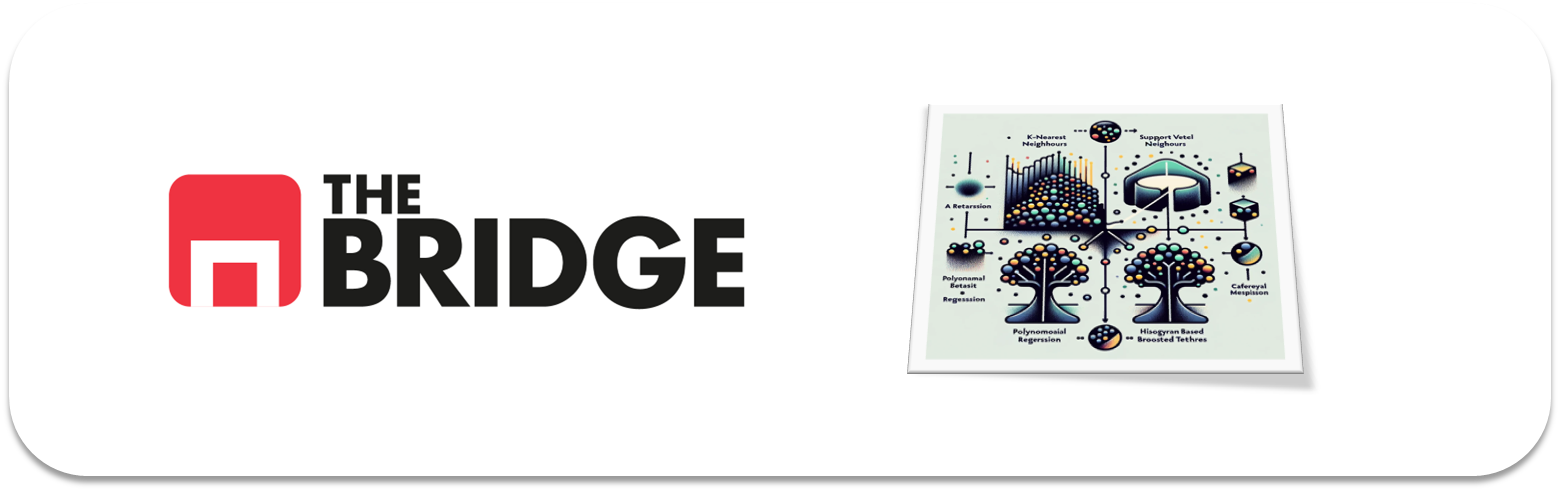

## PRACTICA OBLIGATORIA: **Repaso Aprendizaje Supervisado**

* La práctica obligatoria de esta unidad consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import recall_score, make_scorer
from sklearn.metrics import classification_report, confusion_matrix

### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

Muestra la distribución de ambos targets y haz un pequeño assesment previo de cada problema. NOTA: El dataset está limpio y sin valores faltantes.

In [5]:
# Cargar el dataset
df = pd.read_csv(r'C:\DATA_SCIENCE\MASTER DATA SCIENCE\Prácticas Máster Data Science\Practicas_Data_Science\Prácticas Python\Ejercicios Sprint 12 - ML Modelos Supervisados III_Otros Modelos y Repaso\Unidad_02\Practica_Obligatoria\data\wines_dataset.csv', sep='|')
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [11]:
# Definir las variables target
target_clasificacion = 'quality'
target_regresion = 'alcohol'

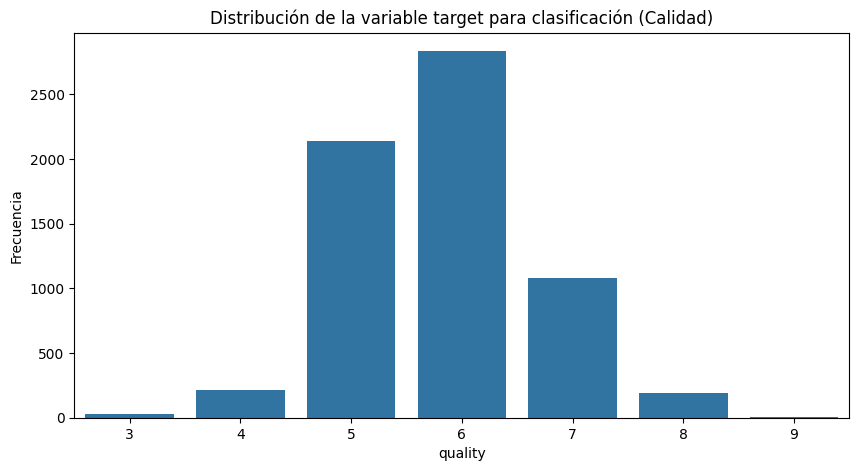

In [12]:
# Mostrar la distribución de la variable target para clasificación
plt.figure(figsize=(10, 5))
sns.countplot(x=target_clasificacion, data=df)
plt.title('Distribución de la variable target para clasificación (Calidad)')
plt.xlabel('quality')
plt.ylabel('Frecuencia')
plt.show()

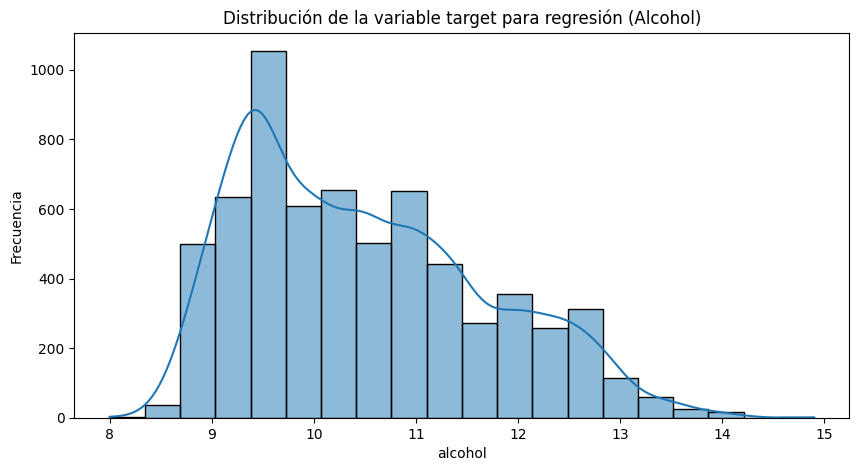

In [13]:
# Mostrar la distribución de la variable target para regresión
plt.figure(figsize=(10, 5))
sns.histplot(df[target_regresion], bins=20, kde=True)
plt.title('Distribución de la variable target para regresión (Alcohol)')
plt.xlabel('alcohol')
plt.ylabel('Frecuencia')
plt.show()

In [15]:
# Problema de clasificación
print("\nProblema de clasificación:")
print(f"Distribución de la variable 'Calidad':\n{df[target_clasificacion].value_counts(normalize=True)}")
print("Objetivo de negocio: Clasificar correctamente lo mejor posible en media (mejor recall medio posible).")


Problema de clasificación:
Distribución de la variable 'Calidad':
quality
6    0.436509
5    0.329075
7    0.166077
4    0.033246
8    0.029706
3    0.004618
9    0.000770
Name: proportion, dtype: float64
Objetivo de negocio: Clasificar correctamente lo mejor posible en media (mejor recall medio posible).


In [16]:
# Problema de regresión
print("\nProblema de regresión:")
print(f"Estadísticas descriptivas de la variable 'Alcohol':\n{df[target_regresion].describe()}")
print("Objetivo de negocio: Equivocarse lo menos posible porcentualmente sobre el grado alcohólico real.")


Problema de regresión:
Estadísticas descriptivas de la variable 'Alcohol':
count    6497.000000
mean       10.491801
std         1.192712
min         8.000000
25%         9.500000
50%        10.300000
75%        11.300000
max        14.900000
Name: alcohol, dtype: float64
Objetivo de negocio: Equivocarse lo menos posible porcentualmente sobre el grado alcohólico real.


### #2 Modelado para clasificación

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente, al menos tres, y utiliza un KNN como modelo baseline, prueba al menos con 2 valores de K. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros (aunque en la sesión en vivo por limitación de tiempos sólo lo haremos con validación cruzada). El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora aunque sea sólo un esbozo.

In [36]:
# Convertir la columna 'Class' a variables dummy
df = pd.get_dummies(df, columns=['class'], drop_first=True)

In [37]:
# Preparar los datos
X = df.drop(columns=['quality'])
y = df['quality']

In [38]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [39]:
# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [40]:
# Definir el modelo baseline KNN con diferentes valores de K
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_5 = KNeighborsClassifier(n_neighbors=5)

In [41]:
# Definir otros modelos
rf = RandomForestClassifier(random_state=42)
svc = SVC(random_state=42)

In [42]:
# Definir la métrica de evaluación
recall_scorer = make_scorer(recall_score, average='macro')

In [43]:
# Evaluar los modelos utilizando validación cruzada
models = {'KNN (k=3)': knn_3, 'KNN (k=5)': knn_5, 'Random Forest': rf, 'SVC': svc}
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring=recall_scorer)
    print(f"{name} - Recall medio: {np.mean(scores):.4f}")

c:\Users\Joaquín\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Joaquín\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Joaquín\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_scorer.py", line 140, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\Joaquín\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_scorer.py", line 380, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\Joaquín\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_scorer.py", line 90, in _

KNN (k=3) - Recall medio: nan
KNN (k=5) - Recall medio: nan


c:\Users\Joaquín\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Joaquín\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_scorer.py", line 140, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\Joaquín\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_scorer.py", line 380, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\Joaquín\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Joaquín\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_response.py", line 207, in _get_response

Random Forest - Recall medio: nan


c:\Users\Joaquín\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Joaquín\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_scorer.py", line 140, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\Joaquín\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_scorer.py", line 380, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\Joaquín\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Joaquín\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_response.py", line 207, in _get_response

SVC - Recall medio: nan


c:\Users\Joaquín\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Joaquín\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_scorer.py", line 140, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\Joaquín\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_scorer.py", line 380, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\Joaquín\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Joaquín\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_response.py", line 207, in _get_response

In [44]:
# Optimización de hiperparámetros para el modelo seleccionado (Random Forest)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring=recall_scorer)
grid_search.fit(X_train_scaled, y_train)

c:\Users\Joaquín\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Joaquín\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Joaquín\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Joaquín\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring=make_scorer(recall_score, response_method='predict', average=macro))

In [45]:
# Mejor modelo después de la optimización
best_rf = grid_search.best_estimator_
best_rf.fit(X_train_scaled, y_train)
y_pred = best_rf.predict(X_test_scaled)

In [46]:
# Evaluar el mejor modelo en el conjunto de prueba
recall = recall_score(y_test, y_pred, average='macro')
print(f"\nMejor modelo (Random Forest optimizado) - Recall en conjunto de prueba: {recall:.4f}")


Mejor modelo (Random Forest optimizado) - Recall en conjunto de prueba: 0.3545


In [53]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Análisis de errores
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred))


Informe de clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.71      0.12      0.20        43
           5       0.74      0.73      0.73       428
           6       0.64      0.79      0.71       567
           7       0.69      0.51      0.59       216
           8       0.93      0.33      0.49        39
           9       0.00      0.00      0.00         1

    accuracy                           0.68      1300
   macro avg       0.53      0.35      0.39      1300
weighted avg       0.69      0.68      0.67      1300



c:\Users\Joaquín\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Joaquín\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Joaquín\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

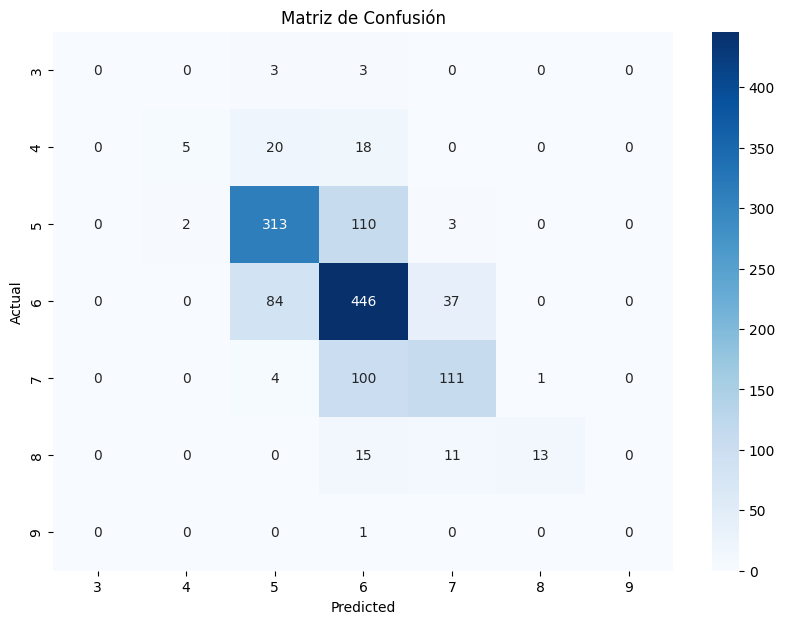

In [54]:
# Graficar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

In [50]:
# Propuesta de mejora
print("\nPropuesta de mejora:")
print("1. Realizar una búsqueda más exhaustiva de hiperparámetros.")
print("2. Probar técnicas de ensamblado como el stacking.")
print("3. Utilizar técnicas de selección de características para reducir la dimensionalidad.")
print("4. Aumentar el tamaño del conjunto de datos mediante técnicas de aumento de datos.")


Propuesta de mejora:
1. Realizar una búsqueda más exhaustiva de hiperparámetros.
2. Probar técnicas de ensamblado como el stacking.
3. Utilizar técnicas de selección de características para reducir la dimensionalidad.
4. Aumentar el tamaño del conjunto de datos mediante técnicas de aumento de datos.


### #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara al menos tres tipos de modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros (en la sesión en vivo lo haremos antes por cuestiones de tiempo). Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.

In [55]:
# Preparar los datos
X = df.drop(columns=['alcohol'])
y = df['alcohol']

In [56]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [64]:
# Definir los modelos
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)
svr = SVR()

In [65]:
# Definir la métrica de evaluación
scoring = 'neg_mean_absolute_error'


In [66]:
# Evaluar los modelos utilizando validación cruzada
models = {'Linear Regression': lr, 'Random Forest': rf, 'SVR': svr}
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring=scoring)
    print(f"{name} - MAE medio: {-np.mean(scores):.4f}")

Linear Regression - MAE medio: 0.3520
Random Forest - MAE medio: 0.2837
SVR - MAE medio: 0.2898


In [67]:
# Optimización de hiperparámetros para el modelo seleccionado (Random Forest)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring=scoring)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_absolute_error')

In [68]:
# Mejor modelo después de la optimización
best_rf = grid_search.best_estimator_
best_rf.fit(X_train_scaled, y_train)
y_pred = best_rf.predict(X_test_scaled)


In [71]:
# Evaluar el mejor modelo en el conjunto de prueba
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nMejor modelo (Random Forest optimizado) - MAE en conjunto de prueba: {mae:.4f}")
print(f"Mejor modelo (Random Forest optimizado) - MSE en conjunto de prueba: {mse:.4f}")
print(f"Mejor modelo (Random Forest optimizado) - R2 en conjunto de prueba: {r2:.4f}")


Mejor modelo (Random Forest optimizado) - MAE en conjunto de prueba: 0.2627
Mejor modelo (Random Forest optimizado) - MSE en conjunto de prueba: 0.1611
Mejor modelo (Random Forest optimizado) - R2 en conjunto de prueba: 0.8857


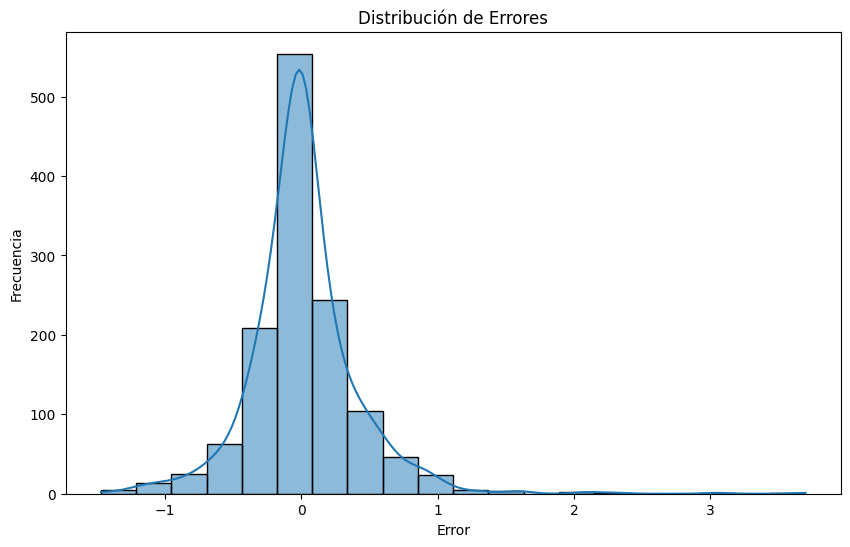

In [72]:
# Análisis de errores
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=20, kde=True)
plt.title('Distribución de Errores')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.show()

In [73]:
# Propuesta de mejora
print("\nPropuesta de mejora:")
print("1. Realizar una búsqueda más exhaustiva de hiperparámetros.")
print("2. Probar técnicas de ensamblado como el stacking.")
print("3. Utilizar técnicas de selección de características para reducir la dimensionalidad.")
print("4. Aumentar el tamaño del conjunto de datos mediante técnicas de aumento de datos.")


Propuesta de mejora:
1. Realizar una búsqueda más exhaustiva de hiperparámetros.
2. Probar técnicas de ensamblado como el stacking.
3. Utilizar técnicas de selección de características para reducir la dimensionalidad.
4. Aumentar el tamaño del conjunto de datos mediante técnicas de aumento de datos.
